<IPython.core.display.Javascript object>


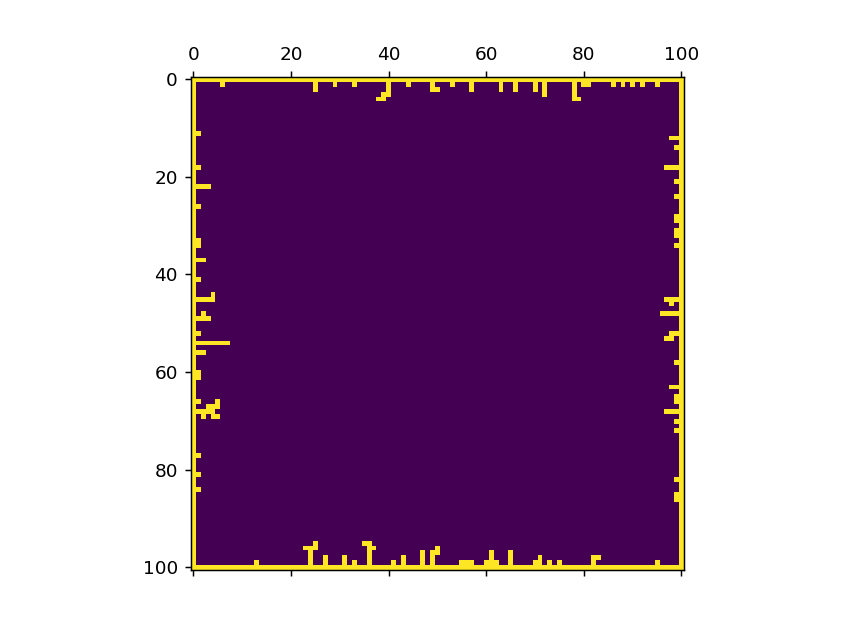

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
% matplotlib nbagg

def setupGrid(nx,ny):
    return np.zeros((nx,ny), dtype=bool)

def setupAttractor(grid):
    nx = grid.shape[0]
    ny = grid.shape[1]
    for index, x in np.ndenumerate(grid):
        if index[0] == 0 or index[0]==nx-1:
            grid[index] = 1
        elif index[1] == 0 or index[1]==ny-1:
            grid[index] = 1
    return grid

def plotGrid(grid,showGrid=False):
    nx = grid.shape[0]
    ny = grid.shape[1]

    plt.imshow(grid, aspect='equal')
    if showGrid==True:
        ax = plt.gca();
        ax = plt.gca();

    # Major ticks
        ax.set_xticks(np.arange(0, nx, 1));
        ax.set_yticks(np.arange(0, ny, 1));

    # Labels for major ticks
        ax.set_xticklabels(np.arange(0, nx, 1));
        ax.set_yticklabels(np.arange(0, ny, 1));

    # Minor ticks
        ax.set_xticks(np.arange(-.5, nx-1, 1), minor=True);
        ax.set_yticks(np.arange(-.5, ny-1, 1), minor=True);

    # Gridlines based on minor ticks
        ax.grid(which='minor', color='w', linestyle='-', linewidth=0.25)
    return None

def isInitialSiteEmpty(matrix):
    nx = matrix.shape[0]
    ny = matrix.shape[1]
    if matrix[(nx-1)//2,(ny-1)//2] == 1:
        return False
    else:
        return True

def checkNeighbors(matrix, nx,ny):
    if matrix[nx-1,ny] == 1:
        matrix[nx,ny] = 1
        return True, matrix
    elif matrix[nx+1,ny] == 1:
        matrix[nx,ny] = 1
        return True, matrix
    elif matrix[nx,ny-1] == 1:
        matrix[nx,ny] = 1
        return True, matrix
    elif matrix[nx,ny+1] == 1:
        matrix[nx,ny] = 1
        return True, matrix
    else: 
        return False, matrix
    
def neighborSitesEmpty(matrix, nx,ny):
    if matrix[nx-1,ny] == 1 or matrix[nx+1,ny] == 1 \
        or matrix[nx,ny-1] == 1 or  matrix[nx,ny+1] == 1:
        return False
    else: 
        return True
    
def takeRandomStep(nx,ny):
    val = np.random.randint(1, 5)
    if val == 1:
        nx = nx + 1
    elif val == 2:
        nx = nx - 1
    elif val == 3:
        ny = ny + 1
    elif val ==4:
        ny = ny - 1
    return nx, ny

def setupDLA(N):
    if N%2 == 0: 
        raise RuntimeError( "Please choose an odd number for N\n Program exiting." )
    nx = N
    ny = N
    grid = setupGrid(nx,ny)
    attractor = setupAttractor(grid)
    return attractor


N = 101
matrix = setupDLA(N)
fig, ax = plt.subplots()
mat = ax.matshow(matrix)

def animateDLA(i):
    global N
    global matrix
    #if isInitialSiteEmpty(matrix) == True: 
    nx = (matrix.shape[0]-1)//2
    ny = (matrix.shape[1]-1)//2
    while neighborSitesEmpty(matrix, nx, ny) == True:
        nx, ny = takeRandomStep(nx, ny)
    matrix[nx, ny] = 1
    mat.set_data(matrix)
    return [mat]

ani= animation.FuncAnimation(fig, animateDLA, interval=1)